In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Checking the Outliers

<Axes: >

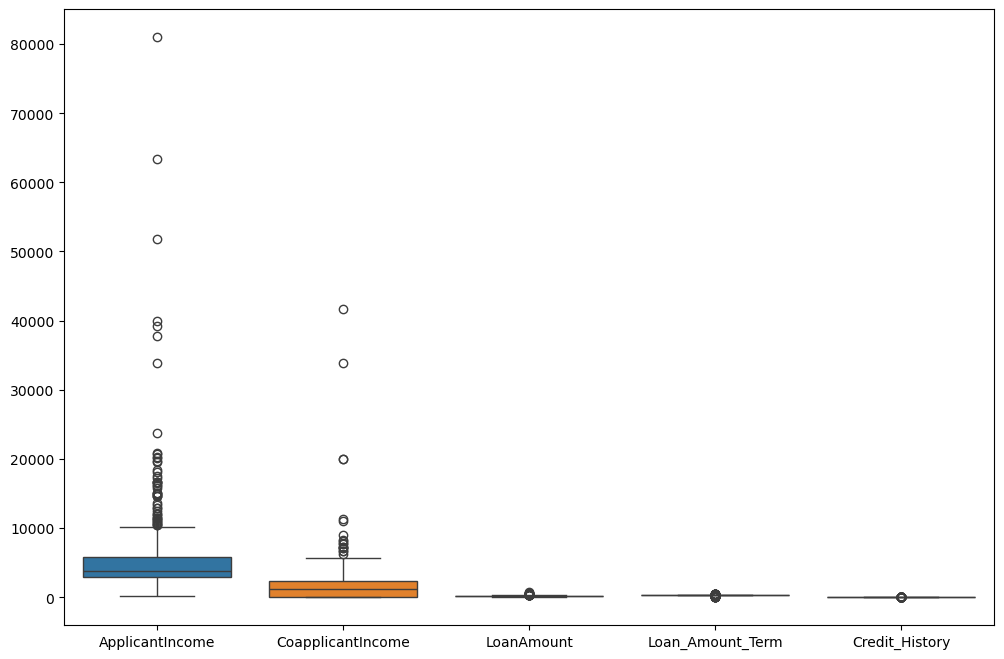

In [7]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df)

### Filling Null Values

In [8]:
df['LoanAmount'].median()

128.0

In [9]:
df['LoanAmount'].mean()

146.41216216216216

In [10]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [11]:
df['Gender'].mode()[0]

'Male'

In [12]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Number of people who took loan by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

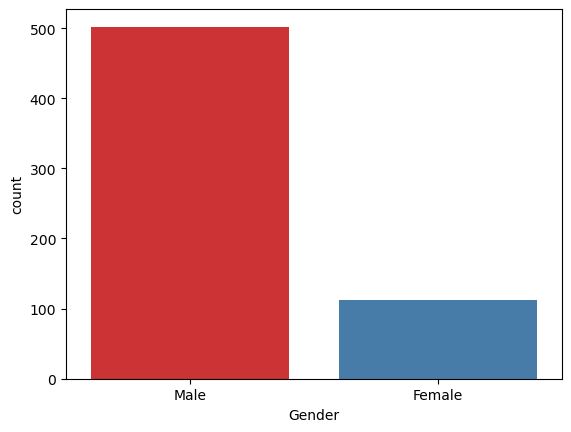

In [14]:
print('Number of people who took loan by gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data = df, palette='Set1')

Number of people who took loan by Married
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

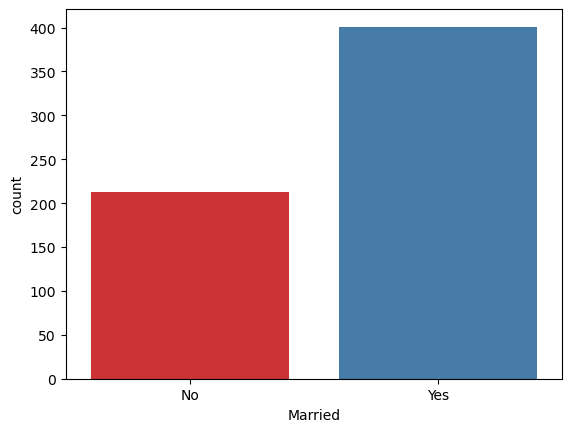

In [15]:
print('Number of people who took loan by Married')
print(df['Married'].value_counts())
sns.countplot(x='Married',data = df, palette='Set1')

Number of people who took loan by Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

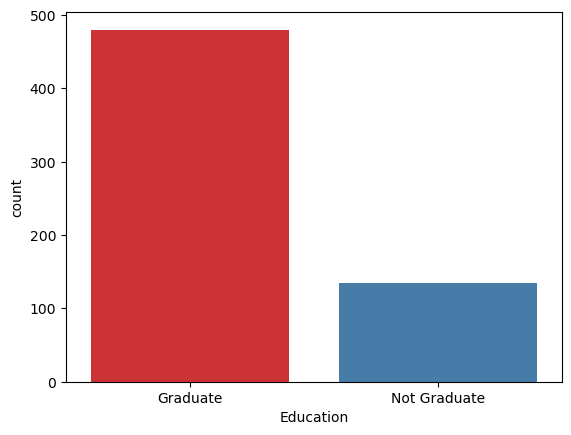

In [16]:
print('Number of people who took loan by Education')
print(df['Education'].value_counts())
sns.countplot(x='Education',data = df, palette='Set1')

In [17]:
corr = df.corr(numeric_only=True)
corr


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,-0.001665
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.007031
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007031,0.001395,1.000000


<Axes: >

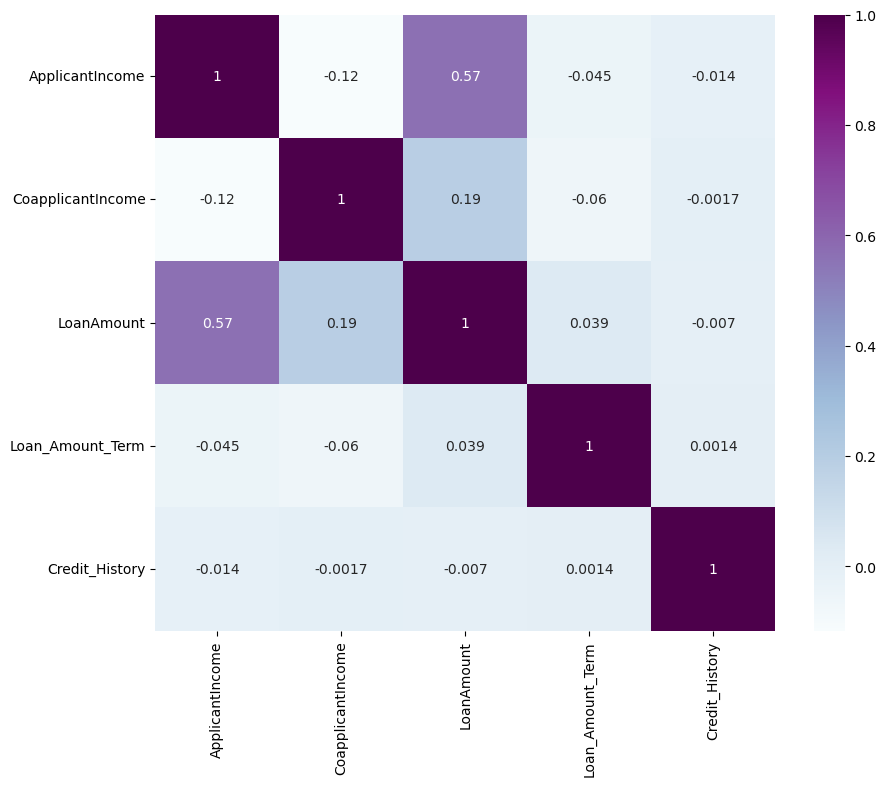

In [18]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot = True, cmap = 'BuPu')

### Feature Engineering

In [19]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<Axes: xlabel='ApplicantIncomelog', ylabel='Density'>

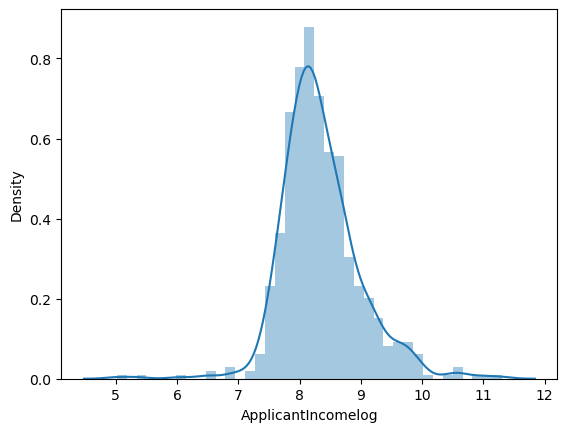

In [20]:
df['ApplicantIncomelog'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df['ApplicantIncomelog'])

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681


<Axes: xlabel='LoanAmountlog', ylabel='Density'>

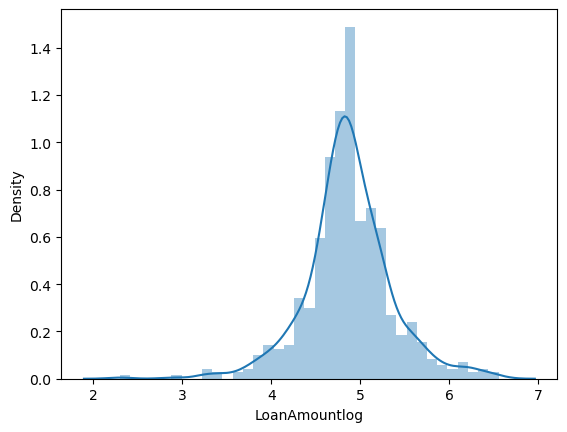

In [22]:
df['LoanAmountlog'] = np.log(df['LoanAmount']+1)
sns.distplot(df['LoanAmountlog'])

<Axes: xlabel='Loan_Amount_Term_log', ylabel='Density'>

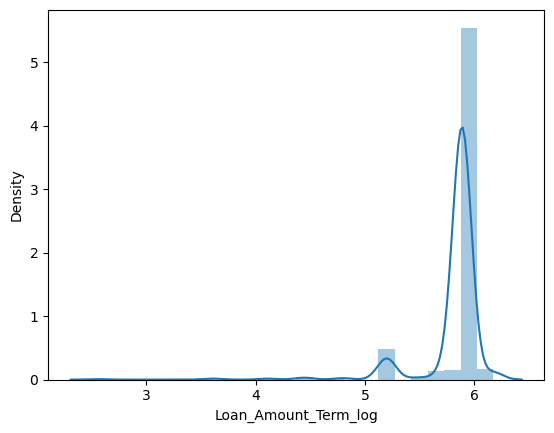

In [23]:
df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df['Loan_Amount_Term_log'])

<Axes: xlabel='Total_Income_log', ylabel='Density'>

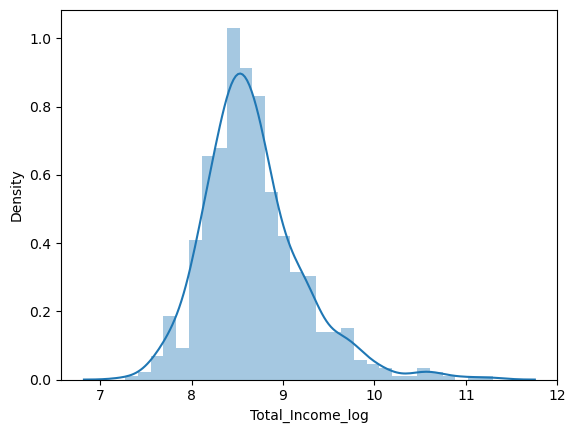

In [24]:
df['Total_Income_log'] = np.log(df['Total_Income']+1)
sns.distplot(df['Total_Income_log'])

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


### Dropping unnecessary columns

In [26]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income', 'Loan_ID']
df = df.drop(columns = cols, axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


### Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status'] 
le = LabelEncoder() 
for col in cols:
    df[col] = le.fit_transform(df[col])

In [28]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [29]:
df.dtypes

Gender                    int64
Married                   int64
Dependents                int64
Education                 int64
Self_Employed             int64
Credit_History          float64
Property_Area             int64
Loan_Status               int64
ApplicantIncomelog      float64
LoanAmountlog           float64
Loan_Amount_Term_log    float64
Total_Income_log        float64
dtype: object

### Split Independent and Dependent Features

In [30]:
X = df.drop(columns = ['Loan_Status'],axis = 1)
Y = df['Loan_Status']

In [31]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972811,4.276666,5.888878,7.972811
610,1,1,3,0,0,1.0,0,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,8.933796,5.236442,5.888878,8.933796


In [32]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 42)

### Logistic Regression

In [35]:
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
y_pred_model1 = model1.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred_model1)
print("Accuracy Logistic Regression model:", accuracy*100)

Accuracy Logistic Regression model: 77.27272727272727


In [36]:
score = cross_val_score(model1,X,Y,cv = 5)
score

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [37]:
score = cross_val_score(model1,X,Y,cv = 20)
score

array([0.87096774, 0.77419355, 0.87096774, 0.74193548, 0.70967742,
       0.80645161, 0.74193548, 0.77419355, 0.74193548, 0.83870968,
       0.74193548, 0.80645161, 0.87096774, 0.87096774, 0.83333333,
       0.86666667, 0.76666667, 0.86666667, 0.83333333, 0.83333333])

In [38]:
np.mean(score)*100

80.80645161290322

### Decision Tree Classifier

In [39]:
model2 = DecisionTreeClassifier()
model2.fit(X_train,Y_train)
y_pred_model2 = model2.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred_model2)
print("Accuracy score of Decision Tree model:", accuracy*100)

Accuracy score of Decision Tree model: 72.72727272727273


In [40]:
score = cross_val_score(model2,X,Y,cv = 5)
print("Cross validation score of Decision Tree:", np.mean(score)*100)

Cross validation score of Decision Tree: 70.52112488337998


In [41]:
score = cross_val_score(model2,X,Y,cv = 20)
print("Cross validation score of Decision Tree:", np.mean(score)*100)

Cross validation score of Decision Tree: 69.24731182795699


### Random Classifier

In [42]:
model3 = RandomForestClassifier()
model3.fit(X_train,Y_train)
y_pred_model3 = model3.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred_model3)
print("Accuracy score of Random Forest Tree model:", accuracy*100)

Accuracy score of Random Forest Tree model: 77.92207792207793


### KNeighbor Model

In [43]:
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train,Y_train)
y_pred_model4 = model4.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred_model4)
print("Accuracy score of KNeighbor model:", accuracy*100)

Accuracy score of KNeighbor model: 71.42857142857143


In [44]:
score = cross_val_score(model4,X,Y,cv = 5)
print("Cross validation score of KNearest Neighbor:", np.mean(score)*100)

Cross validation score of KNearest Neighbor: 73.61721977875517


In [45]:
score = cross_val_score(model4,X,Y,cv = 3)
print("Cross validation score of KNearest Neighbor:", np.mean(score)*100)

Cross validation score of KNearest Neighbor: 73.94229236410011


In [46]:
score = cross_val_score(model4,X,Y,cv = 20)
print("Cross validation score of KNearest Neighbor:", np.mean(score)*100)

Cross validation score of KNearest Neighbor: 75.21505376344086


In [47]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,Y_test,y_pred):
   report = classification_report(Y_test,y_pred)
   print(f"Classification Report For {model_name}:\n{report}\n")

generate_classification_report(model1,Y_test,y_pred_model1)
generate_classification_report(model2,Y_test,y_pred_model2)
generate_classification_report(model3,Y_test,y_pred_model3)
generate_classification_report(model4,Y_test,y_pred_model4)

Classification Report For LogisticRegression():
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154


Classification Report For DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.62      0.56      0.59        54
           1       0.77      0.82      0.80       100

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154


Classification Report For RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.86      0.44      0.59        54
           1       0.76      0.96      0.85       100

    accuracy                

In [48]:
df['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [49]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [50]:
from imblearn.over_sampling import RandomOverSampler

In [51]:
!pip uninstall imbalanced-learn scikit-learn -y
!pip install -U scikit-learn
!pip install -U imbalanced-learn

Found existing installation: imbalanced-learn 0.13.0
Uninstalling imbalanced-learn-0.13.0:
  Successfully uninstalled imbalanced-learn-0.13.0
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
  Using cached scikit_learn-1.7.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (17 kB)
Using cached scikit_learn-1.7.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.wh

In [52]:
from imblearn.over_sampling import RandomOverSampler 

In [53]:
oversample = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = oversample.fit_resample(X,Y)

df_resampled = pd.concat([pd.DataFrame(X_resampled,columns=X.columns),pd.Series(Y_resampled,name="Loan_Status")],axis=1)

In [54]:
X_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.000000,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.000000,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.000000,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.000000,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.000000,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,3,1,0,1.000000,2,8.292298,4.859812,5.198497,8.292298
840,1,1,1,0,0,0.842199,0,7.539559,4.127134,5.888878,7.539559
841,1,1,1,0,0,0.000000,0,7.933080,4.990433,5.888878,8.456381
842,1,1,2,1,0,0.000000,2,7.969012,3.828641,5.198497,7.969012


In [55]:
Y_resampled

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int64

In [57]:
Y_resampled.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [58]:
X_resampled_train, X_resampled_test, Y_resampled_train, Y_resampled_test = train_test_split(X_resampled,Y_resampled,test_size=0.25,random_state=42)

In [59]:
model1 = LogisticRegression()
model1.fit(X_resampled_train,Y_resampled_train)
y_pred_model1 = model1.predict(X_resampled_test)
accuracy = accuracy_score(Y_resampled_test,y_pred_model1)
print("Accuracy Logistic Regression model:", accuracy*100)

Accuracy Logistic Regression model: 69.19431279620854


In [63]:
model2 = DecisionTreeClassifier()
model2.fit(X_resampled_train,Y_resampled_train)
y_pred_model2 = model2.predict(X_resampled_test)
accuracy = accuracy_score(Y_resampled_test,y_pred_model2)
print("Accuracy Score of Decision Tree model:", accuracy*100)

Accuracy Score of Decision Tree model: 79.62085308056872


In [64]:
model3 = RandomForestClassifier()
model3.fit(X_resampled_train,Y_resampled_train)
y_pred_model3 = model3.predict(X_resampled_test)
accuracy = accuracy_score(Y_resampled_test,y_pred_model3)
print("Accuracy Score of Random Forest model:", accuracy*100)

Accuracy Score of Random Forest model: 88.62559241706161


In [68]:
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_resampled_train,Y_resampled_train)
y_pred_model4 = model4.predict(X_resampled_test)
accuracy = accuracy_score(Y_resampled_test,y_pred_model4)
print("Accuracy Score of KNeighbors model:", accuracy*100)

Accuracy Score of KNeighbors model: 72.51184834123224


In [69]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,Y_test,y_pred):
   report = classification_report(Y_test,y_pred)
   print(f"Classification Report For {model_name}:\n{report}\n")

generate_classification_report(model1,Y_resampled_test,y_pred_model1)
generate_classification_report(model2,Y_resampled_test,y_pred_model2)
generate_classification_report(model3,Y_resampled_test,y_pred_model3)
generate_classification_report(model4,Y_resampled_test,y_pred_model4)

Classification Report For LogisticRegression():
              precision    recall  f1-score   support

           0       0.84      0.54      0.65       114
           1       0.62      0.88      0.72        97

    accuracy                           0.69       211
   macro avg       0.73      0.71      0.69       211
weighted avg       0.73      0.69      0.69       211


Classification Report For DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       114
           1       0.81      0.72      0.77        97

    accuracy                           0.80       211
   macro avg       0.80      0.79      0.79       211
weighted avg       0.80      0.80      0.79       211


Classification Report For RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       114
           1       0.85      0.92      0.88        97

    accuracy                